<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/8_Rogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예제 설명
* 수산업체에서 7개의 생선 중 1마리가 랜덤하게 들어있는 '럭키백'을 판매하려고 한다.  
* 럭키백은 A, B, C, ...와 같이 종류가 구분되며, 각 종류별로 생선이 들어있을 확률이 다르다.  
ex. 럭키백 A는 도미가 들어있을 확률이 72%, 빙어가 들어있을 확률이 16%, ...  
* 사용할 수 있는 특성은 **길이, 높이, 두께, 대각선 길이, 무게**이다.  
* 럭키백에 들어간 생선의 특성이 주어졌을 때 **각 생선이 들어있을 확률**을 출력하여 소비자에게 공시해야 한다.

# Try 1. KNeighborsClassifier 사용
앞선 예제에서는 **binary classification**(Bream or Smelt)을 했다.  
본 예제에서는 **multiclass classification**(Bream or Smelt or Parkki or ...)을 한다.

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


`head()`를 통해서 상위 5개 rows를 출력하니 다음과 같은 문제가 발생한다.  
**전체에서 어떤 종류의 생선이 있는지 알 수 없음.**  
이를 다음 cell과 같이 해결할 수 있다.

In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5]) # head()는 df에 대해서만 있는 함수임

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:2])
print()
print(test_scaled[:2])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]]

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

# 여기서는 클래스 확률을 배우는 것이 목적이므로 score값 자체에는 신경쓰지 않는다
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_) # sort by alphabet

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(test_scaled[:5])
print()
print(kn.predict(test_scaled[:5]))

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(proba)
print()
print(np.round(proba, decimals=4))

[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]]

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
print(test_scaled[3:4]) # 2-dim
print(test_scaled[3]) # 1-dim
print()

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes]) # test_scaled의 row 3의 최근접 이웃 3개를 리턴

[[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]]
[-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]

[['Roach' 'Perch' 'Perch']]


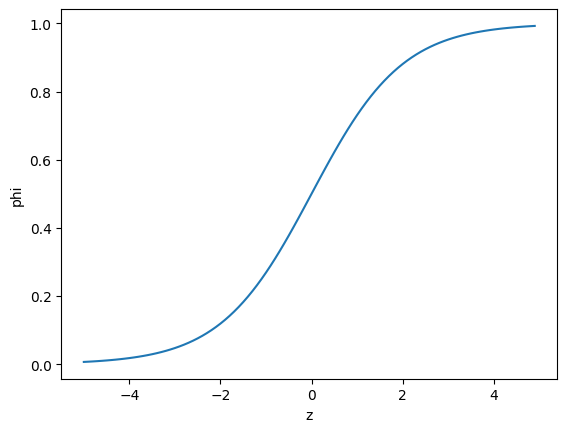

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5부터 5까지 0.1 간격으로 배열을 생성
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr)
print(char_arr[[True, False, True, False, False]]) # boolean indexing in numpy array

['A' 'B' 'C' 'D' 'E']
['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print("example : {}\n".format(bream_smelt_indexes[:5]))

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt[:3])
print()
print(target_bream_smelt[:3])

example : [ True False  True False False]

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]]

['Bream' 'Smelt' 'Bream']


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt)[:5]) # col1은 음성 클래스(0)에 대한 확률, col2는 양성 클래스(1)에 대한 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_) # 차례대로 0, 1 클래스

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


$ z = -0.404*x_1 -0.576*x_2 - 0.663*x_3 - 1.013*x_4 - 0.732*x_5 - 2.161$  
sigmoid function is $ \sigma(z) =  \frac{1}{1+e^{-z}} $  
클래스에 대한 확률 = sigmoid function의 출력값

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5]) # 해당하는 data instance의 양성 클래스에 대한 z값을 리턴
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit

print(expit(decisions)) # 이 함수는 양성 클래스에 대한 시그모이드(z)값을 리턴함

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


multi classification 시작

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

# 적절한 score
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)
print(lr.coef_) # x_1 ~ x_5에 대한 weight값이 각 class(Bream, Parkki, ..., Whitefish)에서 마다 다름
# 즉, 회귀식이 7개라는 말임
# x^1 data instance에 대해서 판단할 때 7개의 회귀식에 모두 x_1 ~ x_5를 넣으면 7개의 z값이 나옴
# 또한 x^1에 대한 7개의 z값을 softmax function에 넣으면 7개의 확률 값이 나옴
# 이때 sigmoid와는 다르게 7개의 확률값의 합은 1임이 보장됨
print(np.round(lr.coef_, decimals=2))

(7, 5) (7,)
[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]]
[[-1.49 -1.03  2.59  7.7  -1.2 ]
 [ 0.2  -2.01 -3.78  6.5  -1.99]
 [ 3.56  6.34 -8.49 -5.76  3.79]
 [-0.1   3.6   3.93 -3.62 -1.75]
 [-1.4  -6.08  5.26 -0.87  1.86]
 [-1.39  1.49  1.39 -5.68 -4.4 ]
 [ 0.62 -2.32 -0.91  1.72  3.69]]


In [ ]:
decision = lr.decision_function(test_scaled[:5]) # z값
print(np.round(decision, decimals=2))
# row1 기준 col1에 대한 소프트맥수 함수(z) 출력값 = (-6.5) / (-6.5 + 1.03 + 5.16 - 2.73 + 3.34 + 0.33 - 0.63)
# 위 계산값은 작은 값이라 0 확률로 나오긴 함(다음 cell 참조)

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=2))

[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.04 0.   0.01 0.95 0.  ]
 [0.   0.   0.03 0.93 0.02 0.02 0.  ]
 [0.01 0.03 0.31 0.01 0.57 0.   0.08]
 [0.   0.   0.9  0.   0.09 0.   0.  ]]
